In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Function som bounder mellem 0 og 1
def logit(z):
    return 1/(1+np.exp(-z))

# Function som finder afstanden mellem knuder
def dist(Zi,Zj):
    sum = 0
    for k in (0,len(Zi)-1):
        sum += (Zi[k]-Zj[k])**2
    return sum

# Function P(y|theta)
def prop(theta,y):
    return (theta**y)*((1-theta)**(1-y))

# Gradient function
def grad(edge_m,index_i):
    return (2*Y[edge_m][0]*(points[Y[edge_m][1]][index_i]-points[Y[edge_m][2]][index_i])*np.exp(-Y[edge_m][0]*(alpha-dist(points[Y[edge_m][1]],points[Y[edge_m][2]]))))/(1+np.exp(-Y[edge_m][0]*(alpha-dist(points[Y[edge_m][1]],points[Y[edge_m][2]]))))

In [4]:
# Matrix Y, som er vores graf i matrixform.
Y_matrix = [[0, 1, 0, 0], 
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [0, 1, 1, 0]]

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

In [66]:
alpha = 5
# Set mean (mu) as a zero vector
mu = np.zeros(2)
# Set covariance matrix
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]])

# Generate random vectors
num_samples = 4  # Number of samples you want to generate

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}
points

{1: array([ 0.46648193, -1.9613242 ]),
 2: array([ 0.16523429, -1.29373368]),
 3: array([-0.83647363, -0.13037327]),
 4: array([-0.10676922, -0.80880906])}

In [84]:
for i in range(1,5):
    for j in range(2):
        sum = 0
        for m in range(len(Y)):
            if ((Y[m][1] == i) or (Y[m][2] == i)):
                sum += grad(m,j)
        points[i][j] += 0.5*sum

In [85]:
points

{1: array([-0.94083254, -0.71623953]),
 2: array([-0.15117238, -0.67837886]),
 3: array([-1.1490707, -0.8624203]),
 4: array([ 1.13714096, -1.18147645])}

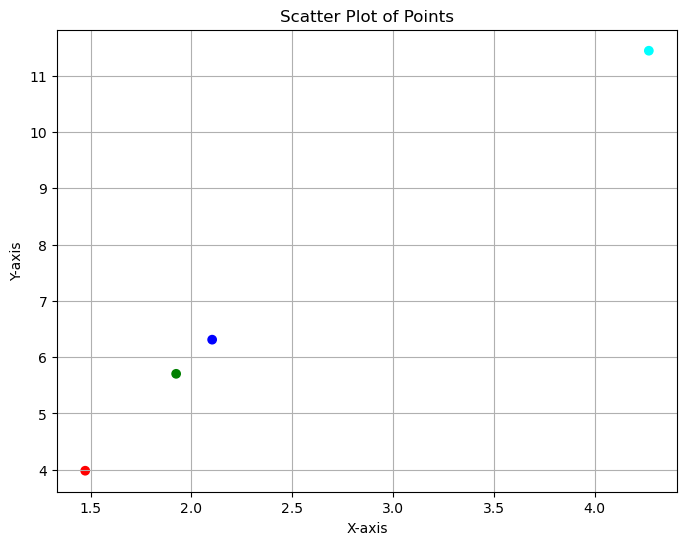

In [33]:
# Extract coordinates
x = [points[i+1][0] for i in range(num_samples)]
y = [points[i+1][1] for i in range(num_samples)]

# Plot points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')
plt.grid(True)
plt.show()

In [86]:
# Calculate thetas for each pair of points
joint_prob = 0
for m in range(len(Y)):
    distance = dist(points[Y[m][1]], points[Y[m][2]])
    theta_ij = logit(alpha - distance)
    joint_prob += np.log(prop(theta_ij, Y[m][0]))

print(joint_prob)

-12.242755534860764


/var/folders/w4/drmx799s2w14d7q5v4w2_y_r0000gn/T/ipykernel_7952/1763300324.py:18: RuntimeWarning: overflow encountered in exp
  return (2*Y[edge_m][0]*(points[Y[edge_m][1]][index_i]-points[Y[edge_m][2]][index_i])*np.exp(-Y[edge_m][0]*(alpha-dist(points[Y[edge_m][1]],points[Y[edge_m][2]]))))/(1+np.exp(-Y[edge_m][0]*(alpha-dist(points[Y[edge_m][1]],points[Y[edge_m][2]]))))
/var/folders/w4/drmx799s2w14d7q5v4w2_y_r0000gn/T/ipykernel_7952/1763300324.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return (2*Y[edge_m][0]*(points[Y[edge_m][1]][index_i]-points[Y[edge_m][2]][index_i])*np.exp(-Y[edge_m][0]*(alpha-dist(points[Y[edge_m][1]],points[Y[edge_m][2]]))))/(1+np.exp(-Y[edge_m][0]*(alpha-dist(points[Y[edge_m][1]],points[Y[edge_m][2]]))))


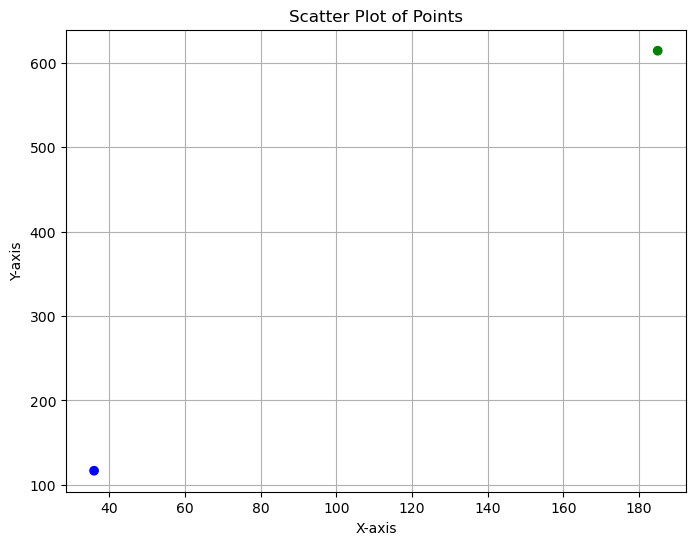

nan


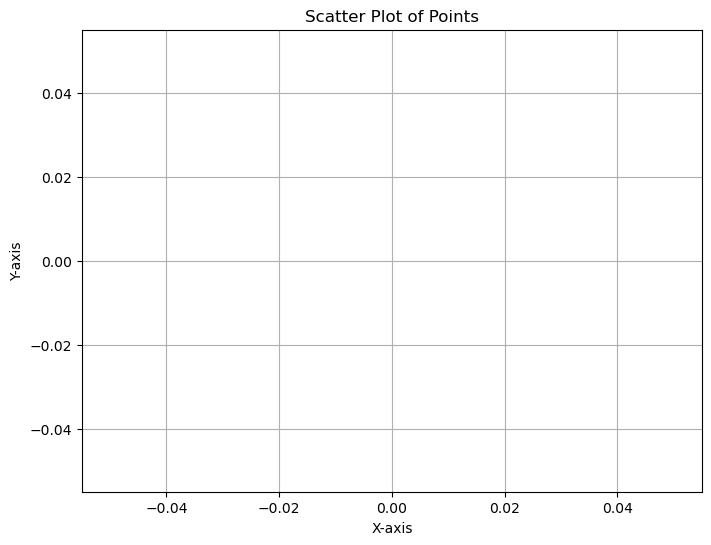

nan


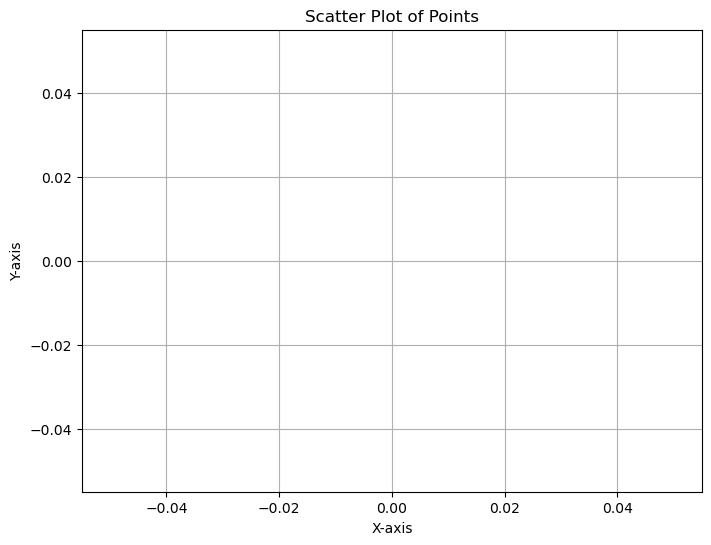

nan


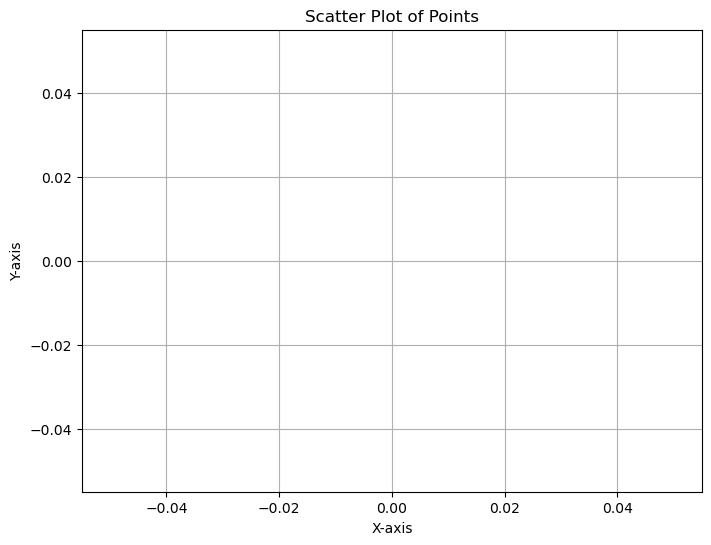

nan


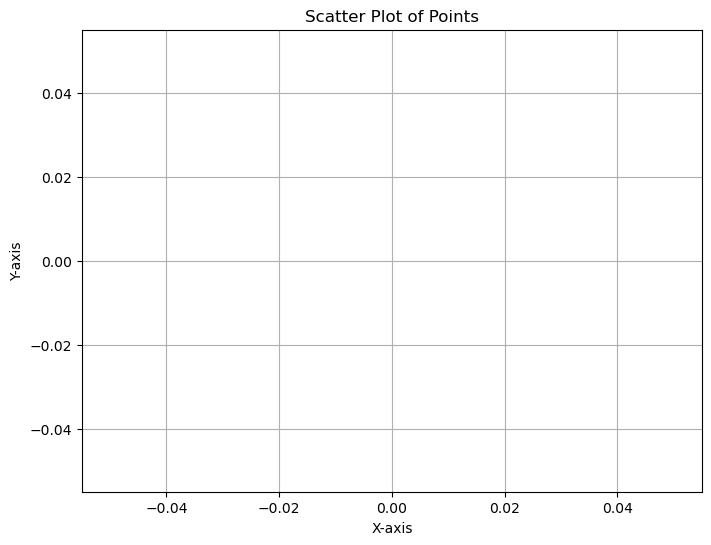

nan


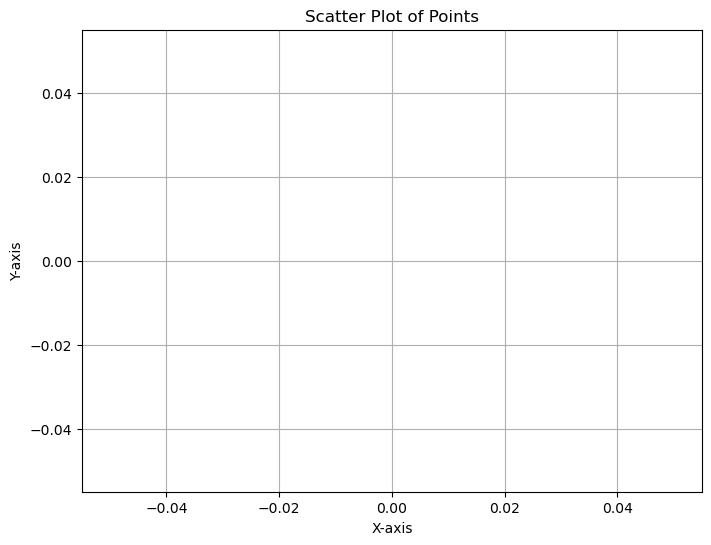

nan


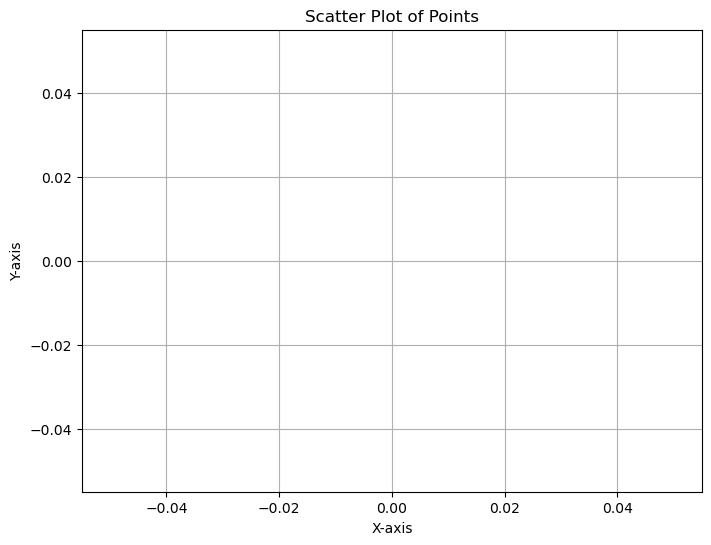

nan


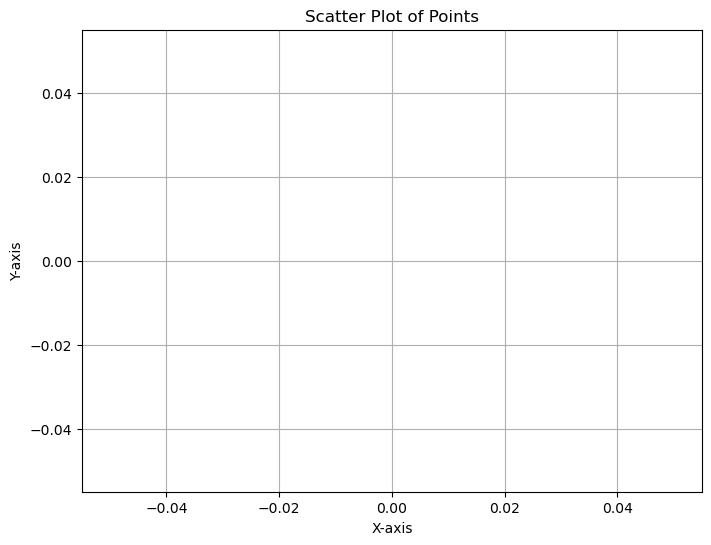

nan


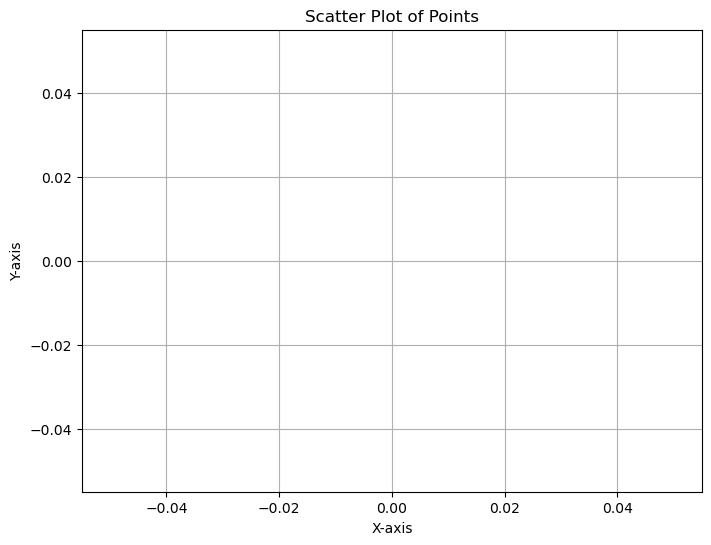

nan


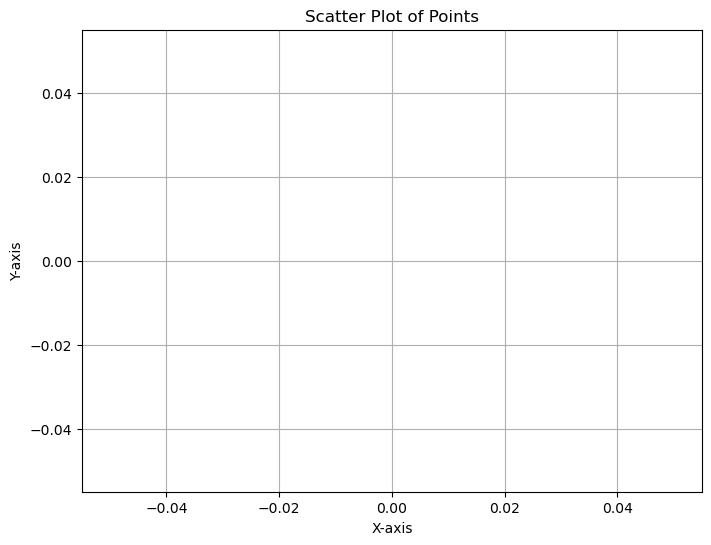

nan


In [49]:
for k in range(10):
    for i in range(1,5):
        for j in range(2):
            sum = 0
            for m in range(len(Y)):
                if ((Y[m][1] == i) or (Y[m][2] == i)):
                    sum += grad(m,j)
            points[i][j] += 1/2*sum
    joint_prob = 0
    for m in range(len(Y)):
        distance = dist(points[Y[m][1]], points[Y[m][2]])
        theta_ij = logit(alpha - distance)
        joint_prob += np.log(prop(theta_ij, Y[m][0]))
    # Extract coordinates
    x = [points[i+1][0] for i in range(num_samples)]
    y = [points[i+1][1] for i in range(num_samples)]

    # Plot points
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color=['blue', 'green', 'red', 'cyan'])
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot of Points')
    plt.grid(True)
    plt.show()

    print(joint_prob)